<a href="https://colab.research.google.com/github/Nivas-DS/walmart-sales-prediction/blob/main/Walmart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Walmart Sales Prediction**


## 📌 Project Description  
Walmart, one of the largest retail chains in the United States, wants to **predict weekly sales accurately** to avoid stock-outs, manage inventory efficiently, and plan promotional events better. Sales are influenced by:

- Major holidays (Super Bowl, Labour Day, Thanksgiving, Christmas)
- Promotional markdown events
- Seasonal variations
- Store-level differences
- Economic indicators such as **CPI** and **Unemployment Rate**

Holiday weeks have **5× higher importance** in evaluation, making accurate forecasting especially critical during these periods.

Historical sales data for **45 Walmart stores** across various regions is available.

---

## 🎯 Business Objective  
Build machine learning models that can accurately predict **Weekly Sales** using:

- Store information  
- Holiday/markdown event effects  
- Economic conditions  
- Seasonal patterns  

The goal is to reduce unexpected demand spikes and prevent stock-outs.

---

## 📂 Dataset Information  
- Source: **Kaggle – Walmart Sales Forecasting Dataset**  
- Data Set link:https://drive.google.com/file/d/1fysxS7vXQcG_8qGQBLe20CdsXz_yMxnz/view?usp=drive_link
- Data includes:  
  - Store, department, and weekly sales  
  - Holiday flag  
  - CPI  
  - Temperature  
  - Fuel price  
  - Unemployment  
  - Date column (weekly)

---

## 🛠️ Project Approach  
1. **Data Understanding & Cleaning**  
   - Handling missing values  
   - Converting data types  
   - Checking for duplicates  

2. **Exploratory Data Analysis (EDA)**  
   - Weekly sales trends  
   - Holiday vs non-holiday comparisons  
   - Correlation heatmap  
   - Store-level sales variations  

3. **Feature Engineering**  
   - Date-based features (month, week, year)  
   - Holiday indicators  
   - Scaling/encoding where required  

4. **Modeling**  
   - Linear Regression  
   - Lasso Regression  
   - Random Forest Regressor  
   - Hyperparameter tuning (GridSearchCV)

5. **Evaluation Metrics**  
   - **R² Score**  
   - **MAE**  
   - **RMSE**  
   - Comparison across all models  

---

## ✅ Success Criteria  
- Achieve good predictive performance (low MAE/RMSE).  
- Ensure model performs well even during **holiday weeks**.  
- Provide interpretable insights that can support inventory planning.  

---

## 🙏 Acknowledgements  
Dataset sourced from **Kaggle – Walmart Sales Forecasting Competition**.


In [ ]:
#importing all the necessary modules

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso



import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Data Set
df=pd.read_csv('/content/drive/MyDrive/Data Sets/Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [98]:
df.shape

(6435, 15)

In [ ]:
# Data Types
df.dtypes

,0
Store,int64
Date,object
Weekly_Sales,float64
Holiday_Flag,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


## Data Cleaning

In [ ]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)
#converted to Date Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


Here CPI = Consumer Price Index CPI measures:

The average change in prices of goods and services

Basically, it's an indicator of inflation

Unemployment = Unemployment Rate (% of people without jobs)
Unemployment affects:

Customer spending

Store footfall

Purchase behavior



In [ ]:
df.isnull().sum()
# Checking for null Values

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
df.duplicated().sum()

np.int64(0)

No Duplicate and null values

In [ ]:
num_cols=[col for col in df.columns if df.dtypes[col]!='O']
cat_cols=[col for col in df.columns if df.dtypes[col]=='O']
print(num_cols,'\n',cat_cols)


['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] 
 []


From above we can see dont have any categorical columns all are numerical columns but the coloumns like 'Stores','Holday flag' are categorical data so lets add them to cat_cols and date to time_col

In [ ]:
cat_cols.append('Store')
cat_cols.append('Holiday_Flag')
num_cols.remove('Store')
num_cols.remove('Holiday_Flag')


In [ ]:
num_cols.remove('Date')
tim_ser=['Date']

**Exploratory Data Analysis**

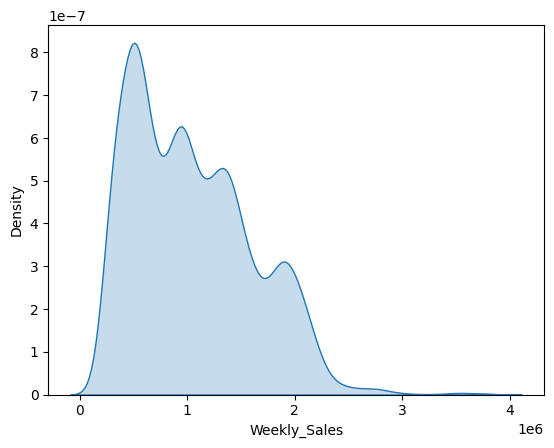

<Axes: xlabel='Weekly_Sales'>

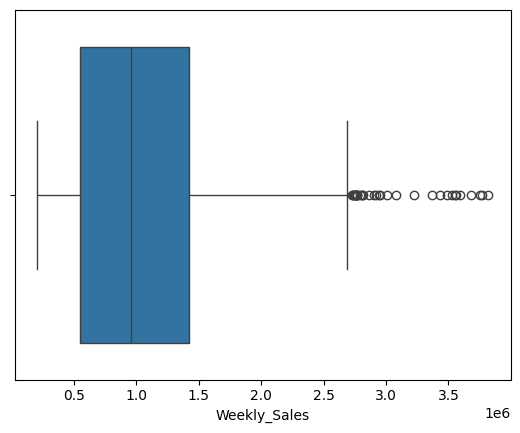

In [ ]:
sns.kdeplot(df['Weekly_Sales'],fill=True)
plt.show()
sns.boxplot(df['Weekly_Sales'],orient='h')

In [ ]:
df['Weekly_Sales_log1p']=np.log1p(df['Weekly_Sales'])

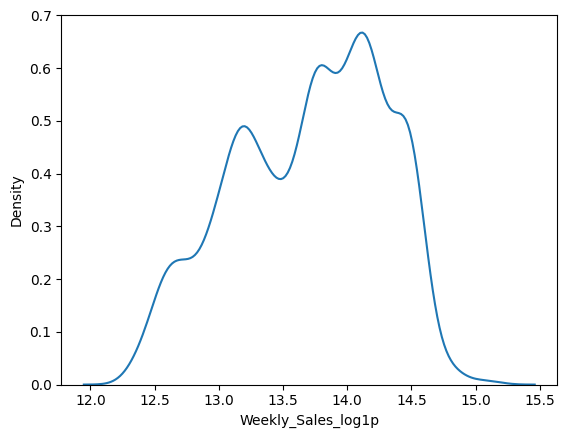

<Axes: xlabel='Weekly_Sales_log1p'>

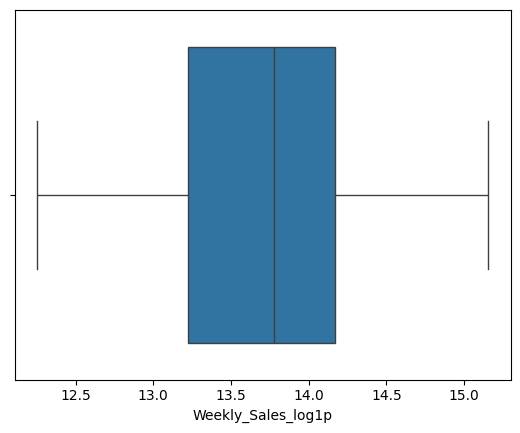

In [ ]:
sns.kdeplot(df['Weekly_Sales_log1p'])
plt.show()
sns.boxplot(df['Weekly_Sales_log1p'],orient='h')

As the target variable is skewed we just used log1p function instead of boxcox as it has values of 0

Now the outliers are not removed we just scaled it so get better model

Weekly_Sales
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


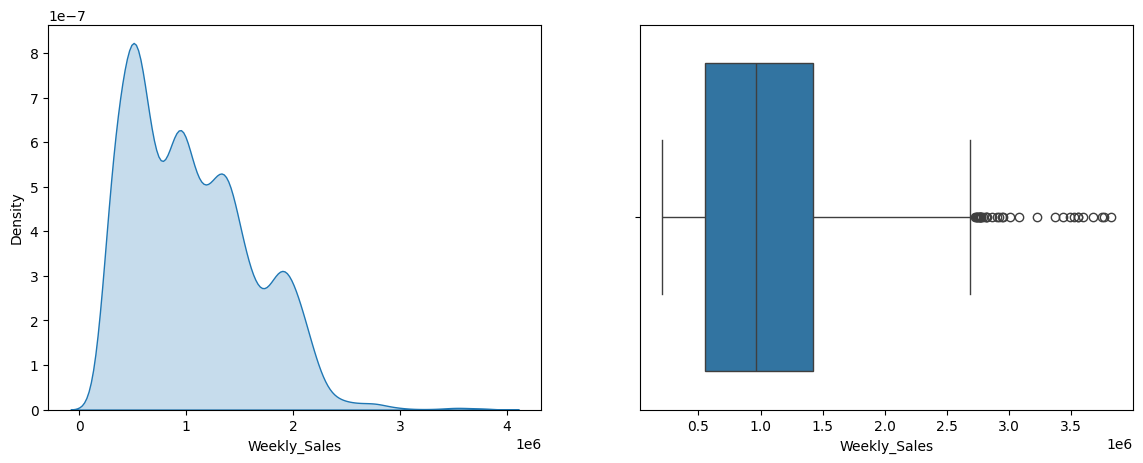


Temperature
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


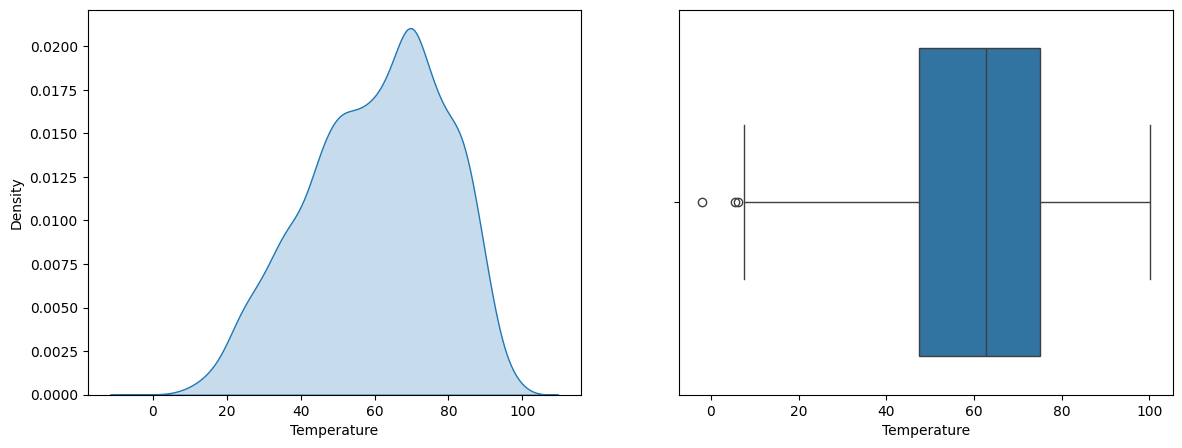


Fuel_Price
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


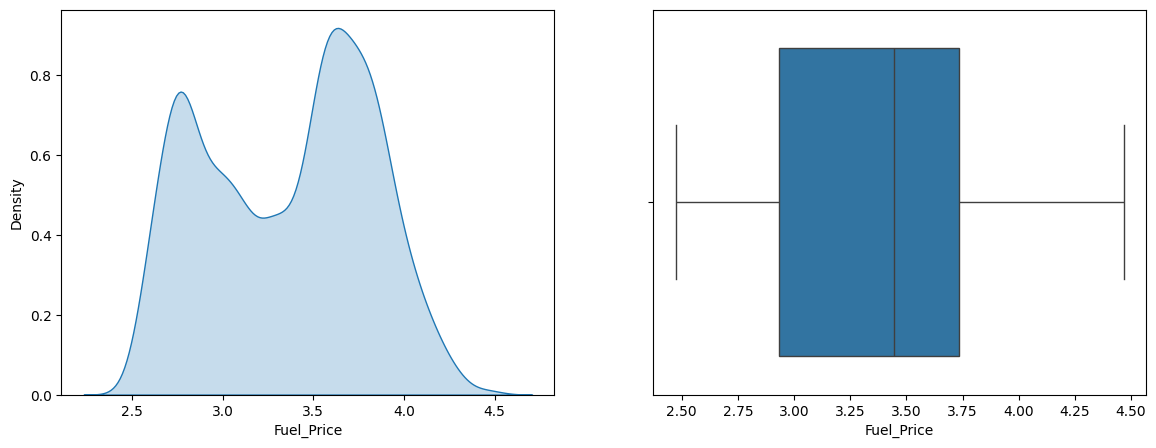


CPI
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


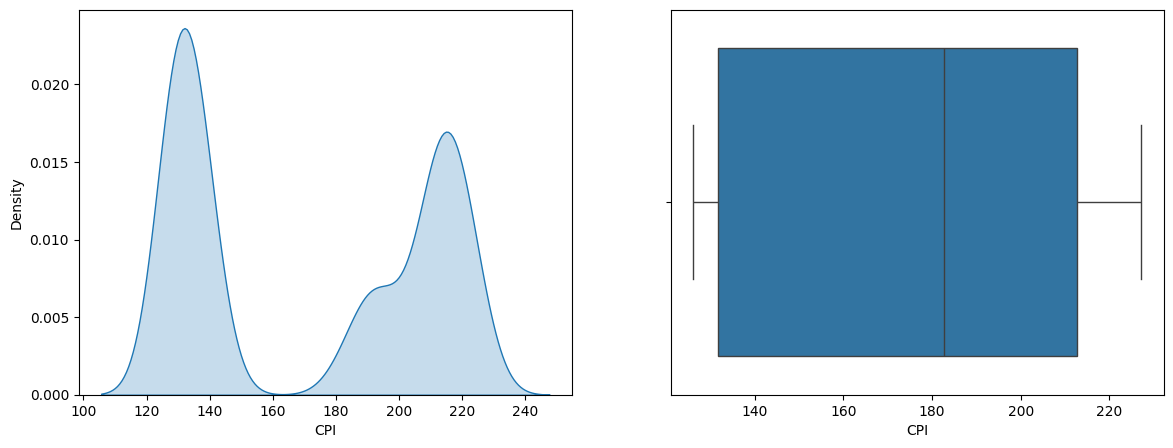


Unemployment
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


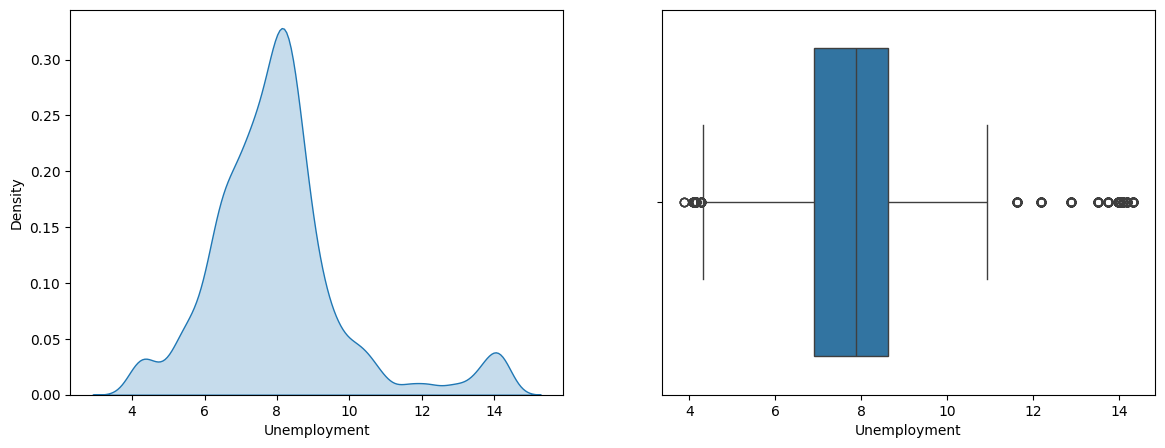

In [ ]:
for i in num_cols:
  print(i)
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,1)
  print(sns.kdeplot(df[i],fill=True))
  plt.subplot(1,2,2)
  print(sns.boxplot(df[i],orient='h'))
  plt.show()
  print()

In [ ]:
df['Unemployment'].describe()

,Unemployment
count,6435.000000
mean,7.999151
std,1.875885
min,3.879000
25%,6.891000
50%,7.874000
75%,8.622000
max,14.313000


In [ ]:
df['Unemployment_log1p'] = np.log1p(df['Unemployment'])


As its slightly skewed we just created new col and use for linear models if needed

In [ ]:
cat_cols

['Store', 'Holiday_Flag']

In [ ]:
df['Store'].value_counts()

,count
Store,
1,143
2,143
3,143
4,143
5,143
6,143
7,143
8,143
9,143


From each store we collected equal data

In [ ]:
store_sales=df.groupby('Store')['Weekly_Sales'].sum().reset_index()
store_sales.sort_values('Weekly_Sales',ascending=False)


,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


In [ ]:
store_sales['Weekly_Sales']=round(store_sales['Weekly_Sales'],4)

In [ ]:
store_sales.sort_values('Weekly_Sales',ascending=False)

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


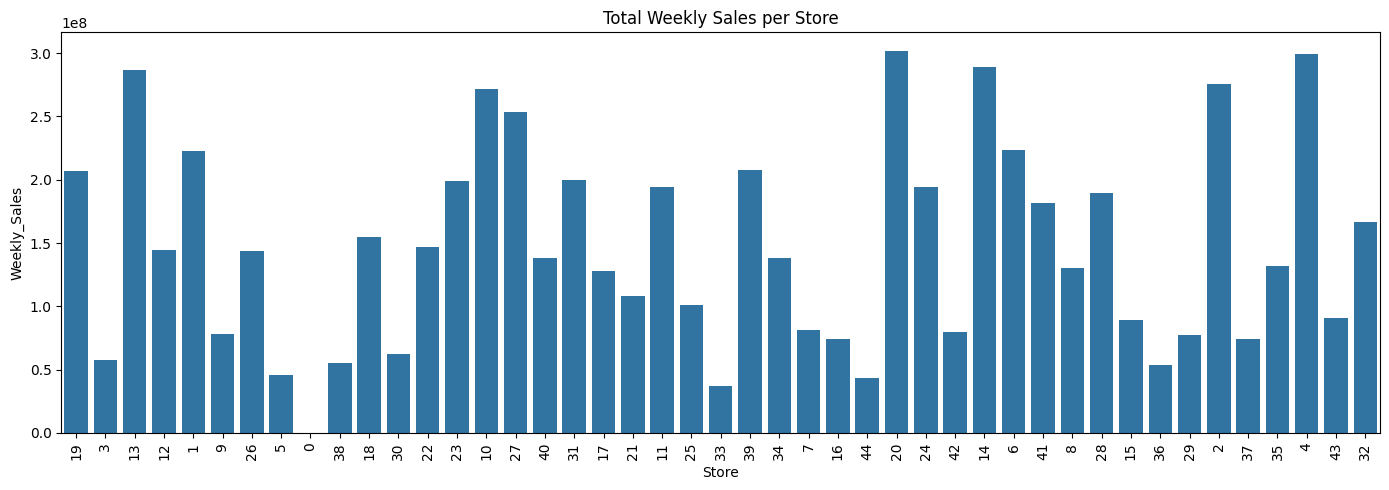

In [ ]:
plt.figure(figsize=(14,5))
sns.barplot(data=store_sales, x='Store', y='Weekly_Sales',order=store_sales['Weekly_Sales'].sort_values(ascending=False).index)
plt.title("Total Weekly Sales per Store")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df[num_cols].corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.063810,0.009464,-0.072634,-0.106176
Temperature,-0.063810,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.009464,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.072634,0.176888,-0.170642,1.000000,-0.302020
Unemployment,-0.106176,0.101158,-0.034684,-0.302020,1.000000


<Axes: >

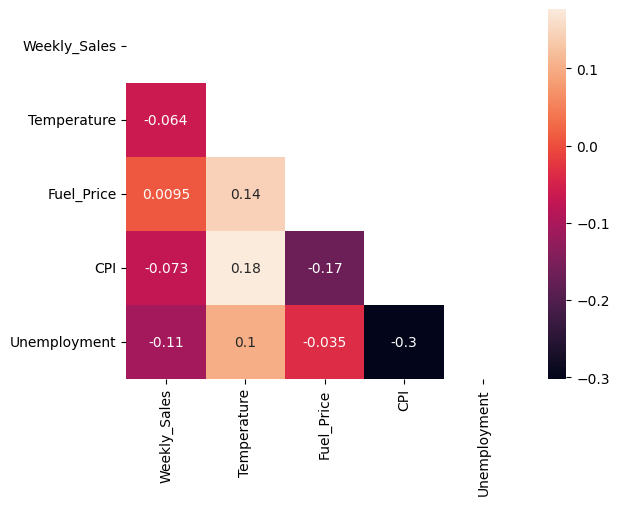

In [ ]:
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, mask=np.triu(corr_matrix), annot=True)

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log1p,Unemployment_log1p
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455,2.208934
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400,2.208934
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,14.292967,2.208934
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,14.158908,2.208934
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862,2.208934


In [ ]:
df['Holiday_Flag'].value_counts()

,count
Holiday_Flag,
0,5985
1,450


<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

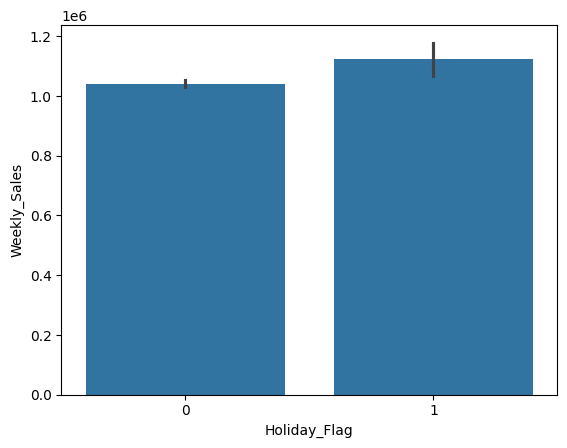

In [ ]:
sns.barplot(data=df,x='Holiday_Flag',y='Weekly_Sales')

From the above its clear that even though we have less data of holidays (450) and non holidays(5985) the total sales is more on holidays only

In [ ]:
avg_sales=df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
avg_sales

,Holiday_Flag,Weekly_Sales
0,0,1.041256e+06
1,1,1.122888e+06


In [ ]:
avg_sales['Holiday_Flag']=avg_sales['Holiday_Flag'].map({0:'non_holiday',1:'Holiday'})

In [ ]:
avg_sales

,Holiday_Flag,Weekly_Sales
0,non_holiday,1.041256e+06
1,Holiday,1.122888e+06


<BarContainer object of 2 artists>

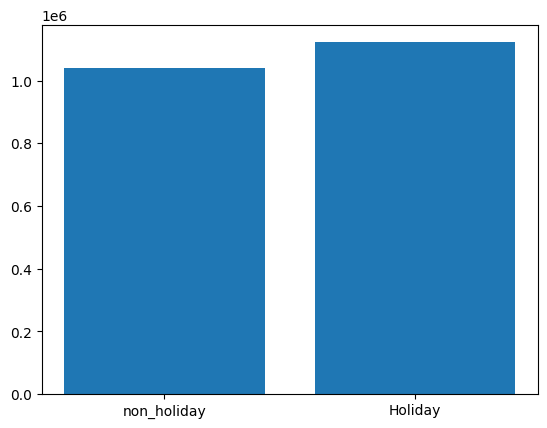

In [ ]:
plt.bar(avg_sales['Holiday_Flag'],avg_sales['Weekly_Sales'])

**Feature Engineering**

In [ ]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df["Week"] = df["Date"].dt.isocalendar().week
df["Quarter"] = df["Date"].dt.quarter
df["DayOfYear"] = df["Date"].dt.dayofyear

In [99]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log1p,Unemployment_log1p,Year,Month,Week,Quarter,DayOfYear
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455,2.208934,2010,2,5,1,36
1287,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765,14.600804,2.376300,2010,2,5,1,36
5148,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554,13.191904,2.256960,2010,2,5,1,36
2288,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548,13.578569,2.021283,2010,2,5,1,36
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324,13.050028,2.232592,2010,2,5,1,36


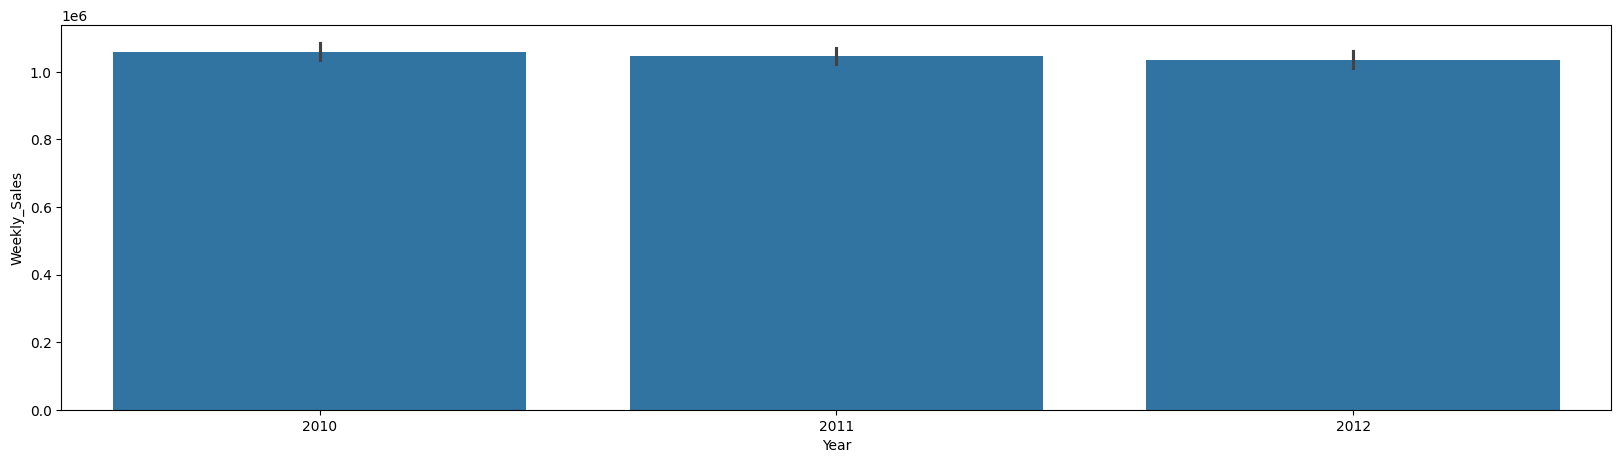

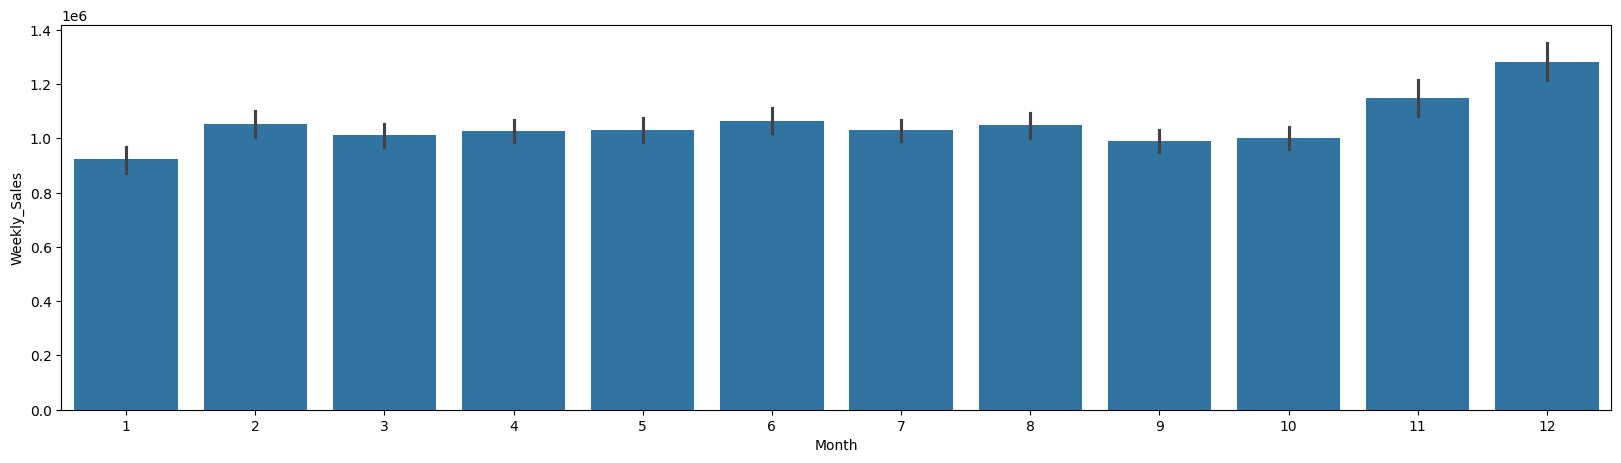

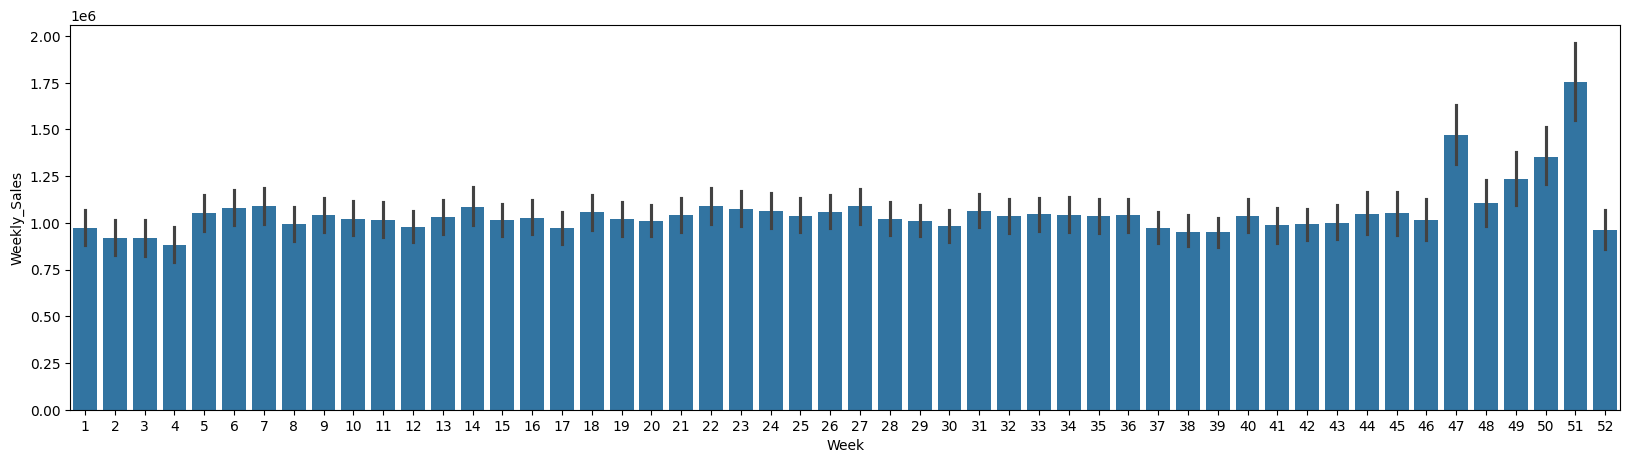

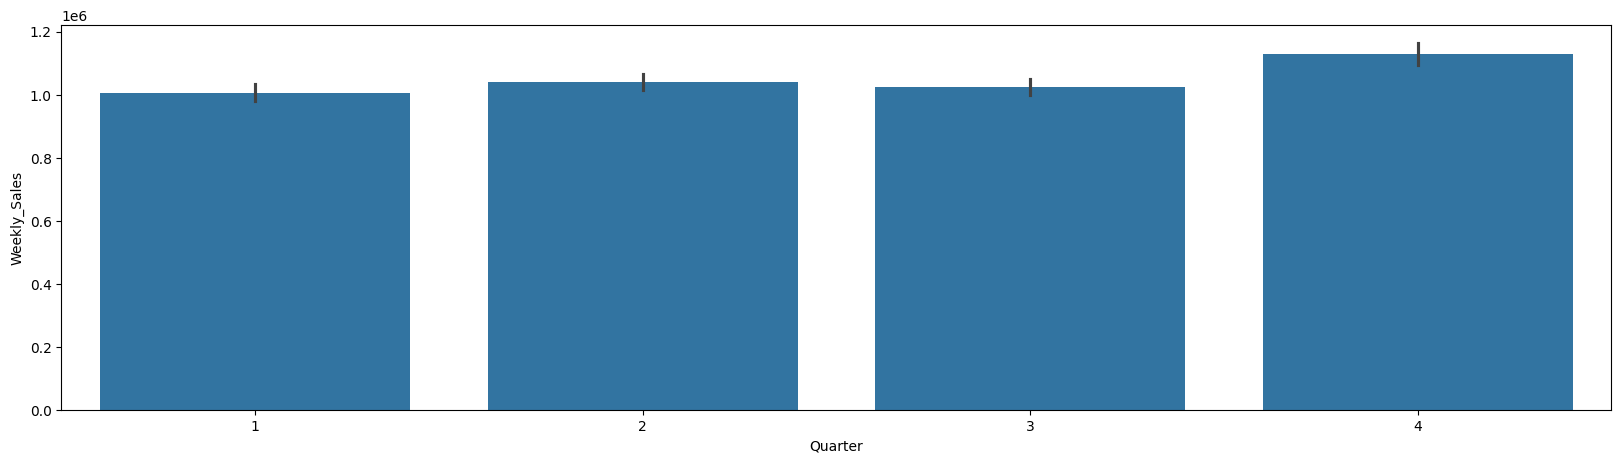

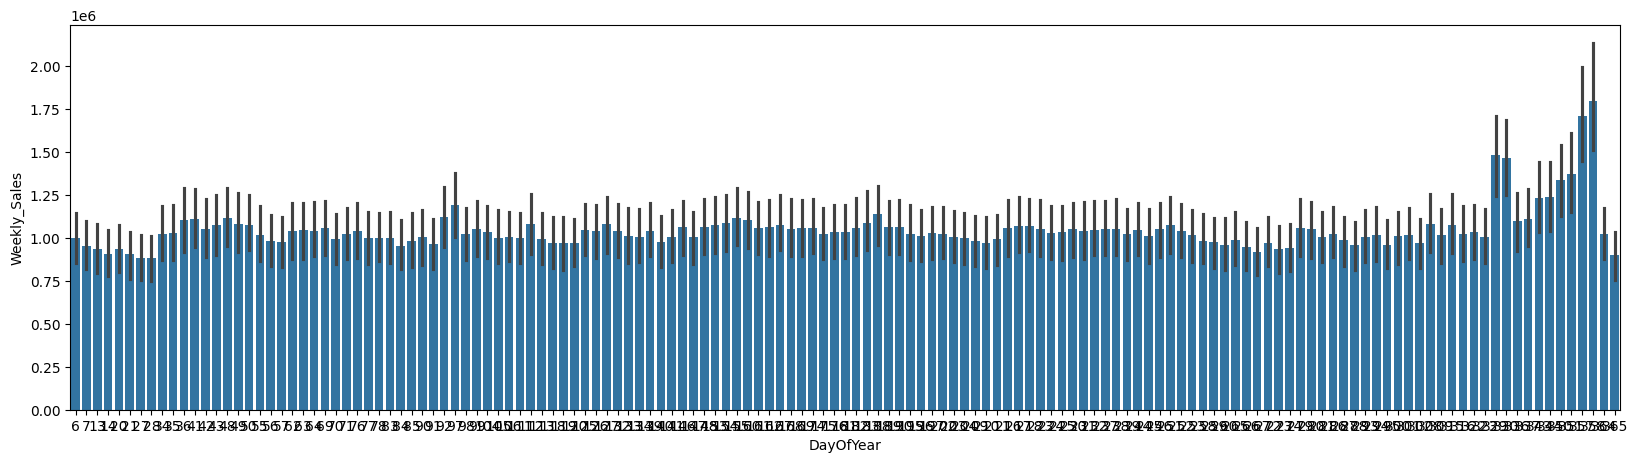

In [ ]:
for i in ['Year','Month','Week','Quarter','DayOfYear']:
  plt.figure(figsize=(20,5))
  sns.barplot(data=df,x=i,y='Weekly_Sales')
  plt.show()
  print()

Nov,December having the most sales,
4th Quarter most sales More Sales noted on christamas day before(24th dec) and during blackfriday

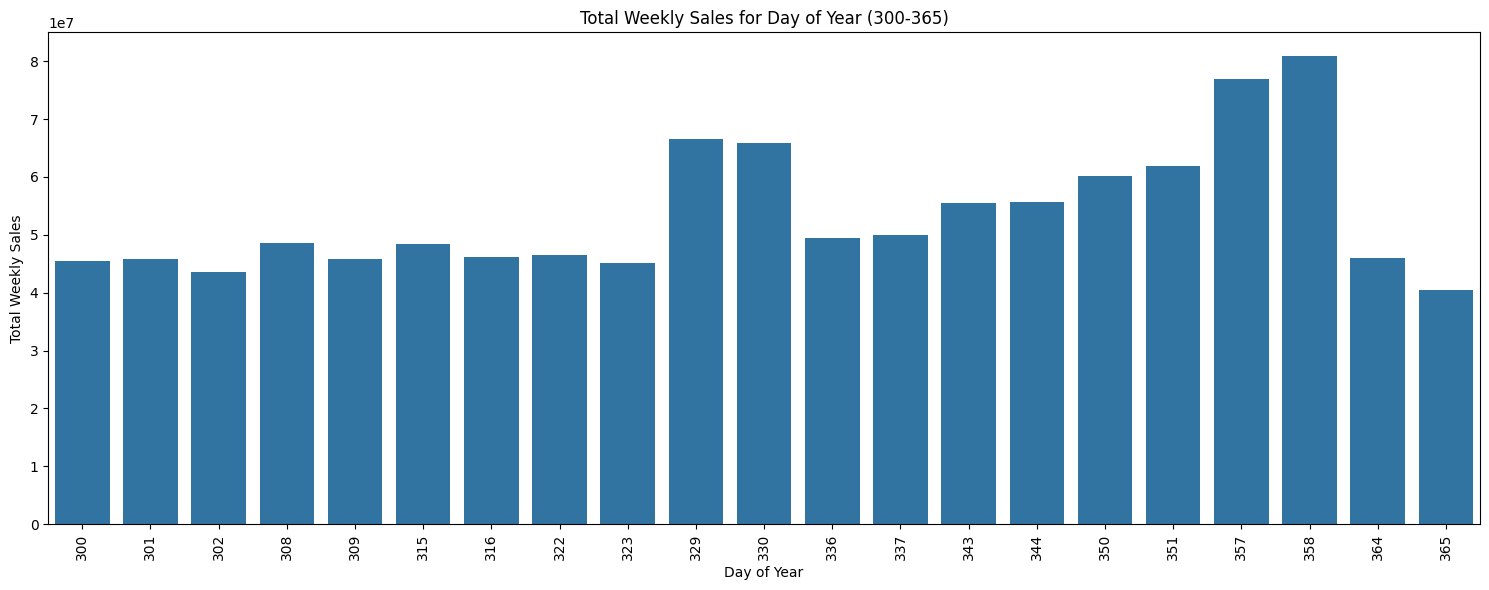

In [ ]:
sales_filtered_dayofyear = df[(df['DayOfYear'] >= 300) & (df['DayOfYear'] <= 365)]
sales_by_day = sales_filtered_dayofyear.groupby('DayOfYear')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=sales_by_day, x='DayOfYear', y='Weekly_Sales')
plt.title('Total Weekly Sales for Day of Year (300-365)')
plt.xlabel('Day of Year')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

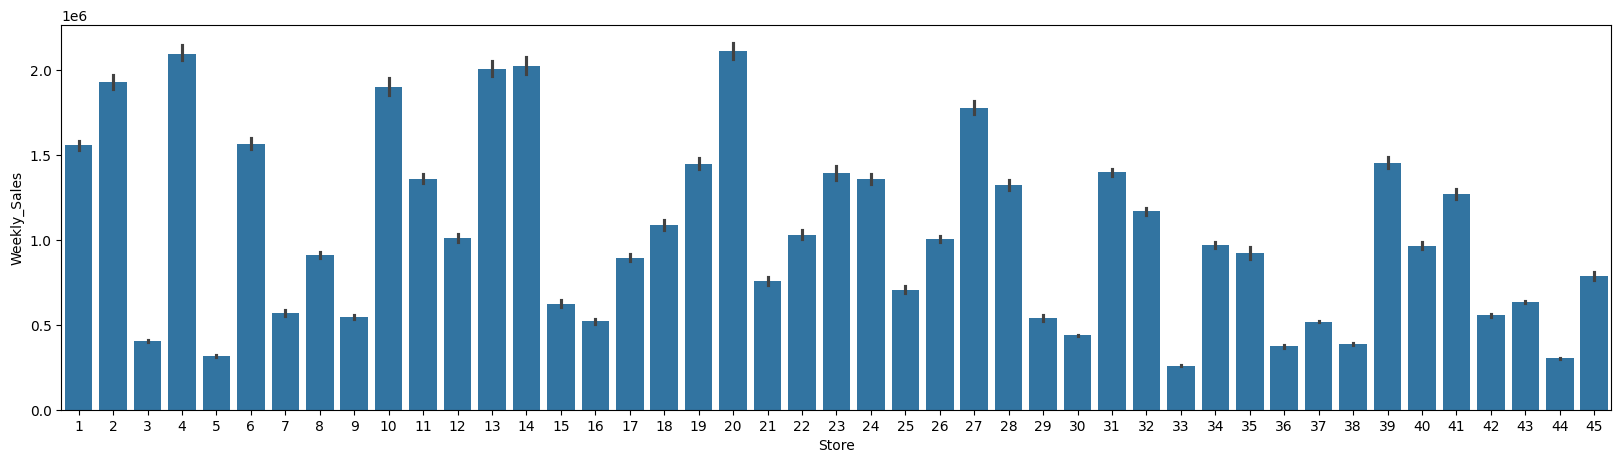

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(data=df,x='Store',y='Weekly_Sales')

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split


As this is the time based data we need to spliting on date bases

In [ ]:
df=df.sort_values('Date')

In [ ]:
df['Year'].describe()

,Year
count,6435.000000
mean,2010.965035
std,0.797019
min,2010.000000
25%,2010.000000
50%,2011.000000
75%,2012.000000
max,2012.000000


In [ ]:
cut_off_date='2012-06-01'

Using cut_off_date for splitting as 80% of data less than specified date

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log1p,Unemployment_log1p,Year,Month,Week,Quarter,DayOfYear
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455,2.208934,2010,2,5,1,36
1287,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765,14.600804,2.376300,2010,2,5,1,36
5148,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554,13.191904,2.256960,2010,2,5,1,36
2288,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548,13.578569,2.021283,2010,2,5,1,36
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324,13.050028,2.232592,2010,2,5,1,36


In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales_log1p',
       'Unemployment_log1p', 'Year', 'Month', 'Week', 'Quarter', 'DayOfYear'],
      dtype='object')

In [ ]:
train_data=df[df['Date']<cut_off_date]
test_data=df[df['Date']>cut_off_date]

In [ ]:
y_train=train_data['Weekly_Sales_log1p']
y_test=test_data['Weekly_Sales_log1p']

In [ ]:
feature_cols=['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Year', 'Month', 'Week', 'Quarter', 'DayOfYear']

In [ ]:
x_train=train_data[feature_cols]
x_test=test_data[feature_cols]

In [ ]:
x_train_lin=x_train.copy()
x_test_lin=x_test.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
x_train['Store']=encoder.fit_transform(x_train['Store'])

x_test['Store']=encoder.transform(x_test['Store'])

**Model Building**

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
baseline=DummyRegressor(strategy='mean')
baseline.fit(x_train,y_train)

print(f"R-squared score on training data: {baseline.score(x_train,y_train)}")


R-squared score on training data: 0.0


In [ ]:
base_pred=baseline.predict(x_test)

Created a baseline model so that we can see how well the model is performed compared to simple statistic predictions

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,base_pred))
mae=mean_absolute_error(y_test,base_pred)
print('Base Line Rmse',round(rmse*100,2))
print('Base line mae',round(mae*100,2))

Base Line Rmse 57.26
Base line mae 48.78


**Simple Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

r_forest=RandomForestRegressor(random_state=42,n_jobs=-1)

r_forest.fit(x_train,y_train)

print(r_forest.score(x_train,y_train))

0.9972460603318496


In [ ]:
y_pred_rf=r_forest.predict(x_test)
rmse_rf=np.sqrt(mean_squared_error(y_test,y_pred_rf))
mae_rf=mean_absolute_error(y_test,y_pred_rf)
rf_r2=r2_score(y_test,y_pred_rf)

print('MAE by RF',round(mae_rf*100,2),'%')
print('RMSE by Rf',round(rmse_rf*100,2),'%')
print(rf_r2*100)

n = x_test.shape[0]  # Number of observations
p = x_test.shape[1]  # Number of predictor variables

adjusted_r2_rr = 1 - (1 - rf_r2) * ((n - 1) / (n - p - 1))

print('Adjusted R2 score for Ridge Regression:', round(adjusted_r2_rr * 100, 2), '%')


MAE by RF 7.75 %
RMSE by Rf 14.89 %
93.23349243296222
Adjusted R2 score for Ridge Regression: 93.15 %


In [ ]:
r_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Feature Importance

In [ ]:
importance=pd.DataFrame({'Features':x_train.columns,
                         'Importance':r_forest.feature_importances_
                         }).sort_values(by='Importance',ascending=False)

In [ ]:
print(importance)

        Features  Importance
0          Store    0.649903
4            CPI    0.222806
5   Unemployment    0.084276
10     DayOfYear    0.013403
8           Week    0.012361
3     Fuel_Price    0.007651
2    Temperature    0.005461
6           Year    0.002228
7          Month    0.001259
1   Holiday_Flag    0.000561
9        Quarter    0.000092


In [ ]:
importance['Importance']=round(importance['Importance']*100,2)
importance['Cum_Imp']=importance['Importance'].cumsum()

In [ ]:
importance.reset_index()

,index,Features,Importance,Cum_Imp
0,0,Store,64.99,64.99
1,4,CPI,22.28,87.27
2,5,Unemployment,8.43,95.70
3,10,DayOfYear,1.34,97.04
4,8,Week,1.24,98.28
5,3,Fuel_Price,0.77,99.05
6,2,Temperature,0.55,99.60
7,6,Year,0.22,99.82
8,7,Month,0.13,99.95
9,1,Holiday_Flag,0.06,100.01


In [ ]:
importance = importance.reset_index()
importance.drop('index',axis=1,inplace=True)

In [ ]:
importance

,Features,Importance,Cum_Imp
0,Store,64.99,64.99
1,CPI,22.28,87.27
2,Unemployment,8.43,95.70
3,DayOfYear,1.34,97.04
4,Week,1.24,98.28
5,Fuel_Price,0.77,99.05
6,Temperature,0.55,99.60
7,Year,0.22,99.82
8,Month,0.13,99.95
9,Holiday_Flag,0.06,100.01


Random Forest with gridsearch cv

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
x_train.shape

(5445, 11)

In [ ]:
params={'n_estimators': [100,120,150],
        'max_depth':[2,5,7,11],
        'min_samples_split':[5,10,15,20],
        'min_samples_leaf':[1,5,3],
        'max_features':['sqrt','log2']
        }
gridsearch=GridSearchCV(estimator=r_forest,param_grid=params,cv=5,
                        n_jobs=-1,verbose=4
                        )
gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 7, 11],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 3],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [100, 120, 150]},
             verbose=4)

In [ ]:
best_params_gsc=gridsearch.best_params_

In [67]:
best_params_gsc={'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 150} # these are the best_params

{'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 150}

Training the Random Forest with the best params

In [68]:
r_forest_bp=RandomForestRegressor(**best_params_gsc,random_state=42,n_jobs=-1)

r_forest_bp.fit(x_train,y_train)

print(r_forest_bp.score(x_train,y_train))

y_pred_rf_bp=r_forest_bp.predict(x_test)
rmse_rf_bp=np.sqrt(mean_squared_error(y_test,y_pred_rf_bp))
mae_rf_bp=mean_absolute_error(y_test,y_pred_rf_bp)

print('MAE by RF',round(mae_rf_bp*100,2))
print('RMSE by Rf',round(rmse_rf_bp*100,2))

0.8912434440053244
MAE by RF 24.83
RMSE by Rf 31.01


Here the result are worse than normal Random forest due to in cv we are using random search lets use timeseries split

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
params = {
    "n_estimators": [100, 200],
    "max_depth": [10, 15, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf = RandomForestRegressor(random_state=42)

grid = GridSearchCV(
    rf,
    param_grid=params,
    cv=tscv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

grid.fit(x_train, y_train)

print("Best params:", grid.best_params_)
print("Best RMSE:", (-grid.best_score_)**0.5)


In [69]:
tim_ser_bp={'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

# best params stored by time series split
r_forest_bp_ts=RandomForestRegressor(**tim_ser_bp,random_state=42,
                                     n_jobs=-1)

r_forest_bp_ts.fit(x_train,y_train)

print(r_forest_bp_ts.score(x_train,y_train))

y_pred_rf_bp_ts = r_forest_bp_ts.predict(x_test)
rmse_rf_bp_ts = np.sqrt(mean_squared_error(y_test,y_pred_rf_bp_ts))
mae_rf_bp_ts = mean_absolute_error(y_test,y_pred_rf_bp_ts)

print('MAE by RF',round(mae_rf_bp_ts*100,2))
print('RMSE by Rf',round(rmse_rf_bp_ts*100,2))

0.9965911799432465
MAE by RF 7.77
RMSE by Rf 15.0


In [70]:
rf_ts_r2=r2_score(y_test,y_pred_rf_bp_ts)
adjusted_r2_rr = 1 - (1 - rf_ts_r2) * ((n - 1) / (n - p - 1))

print('Adjusted R2 score for Ridge Regression:', round(adjusted_r2_rr * 100, 2), '%')
print(rf_ts_r2)


Adjusted R2 score for Ridge Regression: 93.06 %
0.9313713160933349


In [71]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [72]:
x_train_lin.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter,DayOfYear
0,1,0,42.31,2.572,211.096358,8.106,2010,2,5,1,36
1287,10,0,54.34,2.962,126.442065,9.765,2010,2,5,1,36
5148,37,0,45.97,2.572,209.852966,8.554,2010,2,5,1,36
2288,17,0,23.11,2.666,126.442065,6.548,2010,2,5,1,36
4147,30,0,39.05,2.572,210.752605,8.324,2010,2,5,1,36


In [73]:
from sklearn.preprocessing import OneHotEncoder

In [74]:
# Ensure x_train_lin has 'Store' column by re-initializing from x_train
x_train_lin = x_train.copy()

ohe=OneHotEncoder(drop='first',dtype=int,sparse_output=False)
ohe_store=ohe.fit_transform(x_train_lin[['Store']])
ohe_store_encoded=pd.DataFrame(ohe_store,columns=ohe.get_feature_names_out(), index=x_train_lin.index)

# Now concatenate and drop the original 'Store' column
x_train_lin = pd.concat([x_train_lin.drop('Store',axis=1), ohe_store_encoded], axis=1)

# Display the head of the modified x_train_lin to verify
x_train_lin.head()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter,DayOfYear,...,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44
0,0,42.31,2.572,211.096358,8.106,2010,2,5,1,36,...,0,0,0,0,0,0,0,0,0,0
1287,0,54.34,2.962,126.442065,9.765,2010,2,5,1,36,...,0,0,0,0,0,0,0,0,0,0
5148,0,45.97,2.572,209.852966,8.554,2010,2,5,1,36,...,0,1,0,0,0,0,0,0,0,0
2288,0,23.11,2.666,126.442065,6.548,2010,2,5,1,36,...,0,0,0,0,0,0,0,0,0,0
4147,0,39.05,2.572,210.752605,8.324,2010,2,5,1,36,...,0,0,0,0,0,0,0,0,0,0


In [75]:
x_train_lin=pd.concat([x_train.drop('Store',axis=1),ohe_store_encoded],axis=1)

In [76]:
x_train_lin

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter,DayOfYear,...,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44
0,0,42.31,2.572,211.096358,8.106,2010,2,5,1,36,...,0,0,0,0,0,0,0,0,0,0
1287,0,54.34,2.962,126.442065,9.765,2010,2,5,1,36,...,0,0,0,0,0,0,0,0,0,0
5148,0,45.97,2.572,209.852966,8.554,2010,2,5,1,36,...,0,1,0,0,0,0,0,0,0,0
2288,0,23.11,2.666,126.442065,6.548,2010,2,5,1,36,...,0,0,0,0,0,0,0,0,0,0
4147,0,39.05,2.572,210.752605,8.324,2010,2,5,1,36,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,0,78.23,3.561,222.332385,5.801,2012,5,21,2,146,...,0,0,0,0,0,0,0,0,0,0
406,0,78.58,3.561,225.251517,6.664,2012,5,21,2,146,...,0,0,0,0,0,0,0,0,0,0
2122,0,67.97,3.979,138.110194,8.150,2012,5,21,2,146,...,0,0,0,0,0,0,0,0,0,0
4982,0,64.77,3.798,142.103278,8.876,2012,5,21,2,146,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Ensure x_test_lin has 'Store' column by re-initializing from x_test
x_test_lin = x_test.copy()

ohe_store_test=ohe.transform(x_test_lin[['Store']])
ohe_store_encoded_test=pd.DataFrame(ohe_store_test,columns=ohe.get_feature_names_out(),index=x_test_lin.index)

# Now concatenate and drop the original 'Store' column
x_test_lin=pd.concat([x_test_lin.drop('Store',axis=1),ohe_store_encoded_test],axis=1)

# Display the head of the modified x_test_lin to verify
x_test_lin.head()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter,DayOfYear,...,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44
1838,0,68.40,3.776,130.889677,5.965,2012,6,23,2,160,...,0,0,0,0,0,0,0,0,0,0
2124,0,59.35,3.871,138.117419,8.150,2012,6,23,2,160,...,0,0,0,0,0,0,0,0,0,0
3268,0,56.82,3.746,138.117419,4.125,2012,6,23,2,160,...,0,0,0,0,0,0,0,0,0,0
2982,0,79.47,3.452,221.387747,6.891,2012,6,23,2,160,...,0,0,0,0,0,0,0,0,0,0
5270,0,81.50,3.452,220.435707,6.989,2012,6,23,2,160,...,0,1,0,0,0,0,0,0,0,0


In [78]:
from sklearn.preprocessing import StandardScaler


In [79]:
x_train_lin.columns

Index(['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Year', 'Month', 'Week', 'Quarter', 'DayOfYear', 'Store_1', 'Store_2',
       'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8',
       'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14',
       'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20',
       'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26',
       'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32',
       'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38',
       'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44'],
      dtype='object')

In [80]:
sc=StandardScaler()

# Define the columns to scale as a list
columns_to_scale = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Year', 'Month', 'Week', 'Quarter', 'DayOfYear']

x_train_lin[columns_to_scale] = sc.fit_transform(x_train_lin[columns_to_scale])

# Apply the same scaling to the test data using the fitted scaler
x_test_lin[columns_to_scale] = sc.transform(x_test_lin[columns_to_scale])

In [81]:
lr=LinearRegression(n_jobs=-1)
lr.fit(x_train_lin,y_train)
print('traiing score',lr.score(x_train_lin,y_train))

traiing score 0.9613320821237654


In [82]:
y_pred_lr=lr.predict(x_test_lin)
rmse_lr=np.sqrt(mean_squared_error(y_test,y_pred_lr))
mae_lr=mean_absolute_error(y_test,y_pred_lr)

print('MAE by LR',round(mae_lr*100,2))
print('RMSE by LR',round(rmse_lr*100,2))

lr_r2=r2_score(y_test,y_pred_lr)
n = x_test_lin.shape[0]  # Number of observations
p = x_test_lin.shape[1]  # Number of predictor variables
adjusted_r2_rr = 1 - (1 - lr_r2) * ((n - 1) / (n - p - 1))

print('Adjusted R2 score for Ridge Regression:', round(adjusted_r2_rr * 100, 2), '%')

print(lr_r2)


MAE by LR 8.24
RMSE by LR 10.98
Adjusted R2 score for Ridge Regression: 96.1 %
0.9632304453118556


In [83]:
result_df=pd.DataFrame({'Model':['LR'],'MAE':['8.24 %'],'RMSE':['10.98 %']})

In [84]:
result_df

,Model,MAE,RMSE
0,LR,8.24 %,10.98 %


In [85]:
new_row_rf = pd.DataFrame([{'Model': 'RF', 'MAE': '7.75 ', 'RMSE': '14.89'}])
result_df = pd.concat([result_df, new_row_rf], ignore_index=True)

In [86]:
result_df

,Model,MAE,RMSE
0,LR,8.24 %,10.98 %
1,RF,7.75,14.89


In [87]:
ler_imp=pd.DataFrame({'features':x_train_lin.columns,'Coeff':lr.coef_})

In [88]:
ler_imp['abs_coeff']=ler_imp['Coeff'].abs()

In [89]:
ler_imp.sort_values(by='abs_coeff',ascending=False)

,features,Coeff,abs_coeff
13,Store_4,-1.657354,1.657354
11,Store_2,-1.408440,1.408440
44,Store_35,-1.359813,1.359813
38,Store_29,-1.250627,1.250627
18,Store_9,1.173065,1.173065
17,Store_8,-1.162540,1.162540
12,Store_3,1.143953,1.143953
21,Store_12,1.129905,1.129905
45,Store_36,-1.058909,1.058909
36,Store_27,1.035646,1.035646


In [90]:
ler_imp.groupby(ler_imp['features'].str.split('_').str[0])['abs_coeff'].sum()

,abs_coeff
features,
CPI,0.417965
DayOfYear,0.075355
Fuel,0.008406
Holiday,0.029385
Month,0.242021
Quarter,0.065169
Store,27.466331
Temperature,0.024098
Unemployment,0.086650


In [91]:
from sklearn.linear_model import Ridge,Lasso

In [92]:
x_train_lin.describe()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter,DayOfYear,...,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44
count,5445.000000,5.445000e+03,5.445000e+03,5.445000e+03,5.445000e+03,5.445000e+03,5.445000e+03,5.445000e+03,5.445000e+03,5.445000e+03,...,5445.000000,5445.000000,5445.000000,5445.000000,5445.000000,5445.000000,5445.000000,5445.000000,5445.000000,5445.000000
mean,0.074380,-1.043956e-16,4.175825e-16,2.505495e-16,-2.818682e-16,-8.076046e-14,3.131869e-17,-8.351650e-17,-5.219781e-17,5.219781e-17,...,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222
std,0.262413,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,...,0.147419,0.147419,0.147419,0.147419,0.147419,0.147419,0.147419,0.147419,0.147419,0.147419
min,0.000000,-3.258446e+00,-1.790489e+00,-1.146124e+00,-2.138229e+00,-1.076838e+00,-1.523389e+00,-1.595025e+00,-1.258813e+00,-1.602715e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-7.104718e-01,-9.685332e-01,-1.002041e+00,-5.765722e-01,-1.076838e+00,-9.354143e-01,-8.516853e-01,-1.258813e+00,-8.516511e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.582296e-02,-1.828246e-02,3.020728e-01,-8.389398e-02,3.093045e-01,-5.345225e-02,-1.759219e-01,-3.575326e-01,-1.679906e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,7.508344e-01,8.623847e-01,1.045721e+00,2.585840e-01,3.093045e-01,8.285098e-01,8.377232e-01,5.437475e-01,8.430566e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.258566e+00,2.201869e+00,1.402121e+00,3.288155e+00,1.695447e+00,1.710472e+00,1.851368e+00,1.445028e+00,1.854104e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
from sklearn.metrics import accuracy_score,r2_score

In [94]:
#Ridge Regression

rid_re=Ridge(alpha=0.5)
rid_re.fit(x_train_lin,y_train)
rid_re_ts=rid_re.score(x_train_lin,y_train)
y_pred_rr=rid_re.predict(x_test_lin)

rmse_rr=np.sqrt(mean_squared_error(y_test,y_pred_rr))
mae_rr=mean_absolute_error(y_test,y_pred_rr)
rr_r2=r2_score(y_test,y_pred_rr)

print('Ridge Regression:')
print('Ridge Regression training score:', round(rid_re_ts*100, 2),'%')
print('MAE by RR:', round(mae_rr*100, 2))
print('RMSE by RR:', round(rmse_rr*100, 2))
print('R2 score:', round(rr_r2*100, 2))


Ridge Regression:
Ridge Regression training score: 96.11 %
MAE by RR: 7.96
RMSE by RR: 10.66
R2 score: 96.54


In [95]:
n = x_test_lin.shape[0]  # Number of observations
p = x_test_lin.shape[1]  # Number of predictor variables

adjusted_r2_rr = 1 - (1 - rr_r2) * ((n - 1) / (n - p - 1))

print('Adjusted R2 score for Ridge Regression:', round(adjusted_r2_rr * 100, 2), '%')


Adjusted R2 score for Ridge Regression: 96.33 %


In [96]:
lasso=Lasso(alpha=0.0005)
lasso.fit(x_train_lin,y_train)
la_re_ts=lasso.score(x_train_lin,y_train)
y_pred_llr=lasso.predict(x_test_lin)

rmse_lr=np.sqrt(mean_squared_error(y_test,y_pred_llr))
mae_lr=mean_absolute_error(y_test,y_pred_llr)
llr_r2=r2_score(y_test,y_pred_llr)

print('lasso Regression:')
print('lasso Regression training score:', round(la_re_ts*100, 2),'%')
print('MAE by lR:', round(mae_lr*100, 2))
print('RMSE by lR:', round(rmse_lr*100, 2))
print('R2 score:', round(llr_r2*100, 2))

lasso Regression:
lasso Regression training score: 95.73 %
MAE by lR: 8.06
RMSE by lR: 10.64
R2 score: 96.55


In [97]:
n = x_test_lin.shape[0]  # Number of observations
p = x_test_lin.shape[1]  # Number of predictor variables

adjusted_r2_rr = 1 - (1 - llr_r2) * ((n - 1) / (n - p - 1))

print('Adjusted R2 score for lasoo Regression:', round(adjusted_r2_rr * 100, 2), '%')


Adjusted R2 score for lasoo Regression: 96.34 %


### 📊 Model Performance Comparison

| Model | Training Score | MAE | RMSE | R² Score | Adjusted R² |
|------|---------------|-----|------|----------|-------------|
| Random Forest | 99.72% | 7.75 | 14.89 | 93.23% | 93.15% |
| Random Forest (GridSearchCV - Random Split) | 89.12% | 24.83 | 31.01 | — | — |
| Random Forest (GridSearchCV - TimeSeriesSplit) | 99.65% | 7.77 | 15.00 | 93.13% | 93.06% |
| Linear Regression | 96.13% | 8.24 | 10.98 | 96.32% | 96.10% |
| Ridge Regression | 96.11% | 7.96 | 10.66 | 96.54% | 96.33% |
| Lasso Regression | 95.73% | 8.06 | 10.64 | 96.55% | 96.34% |


### 🔍 Insights from Model Performance

- The **Random Forest model** achieved the highest training accuracy (99.72%), but its **test R² score (~93%)** indicates slight overfitting.
- The **GridSearchCV with random split** performed poorly compared to other models, suggesting that random splitting did not capture the time-series nature of the data.
- When **TimeSeriesSplit** was used, the Random Forest model performance improved significantly, indicating that time-aware validation works better for sales forecasting tasks.
- Among linear models, **Lasso and Ridge Regression outperformed standard Linear Regression** in terms of R² and RMSE.
- **Lasso Regression achieved the highest R² score (96.55%)**, making it the best-performing model for this dataset.

✅ **Final Model Selected:** Lasso Regression,Ridge Regression
